## Task 1

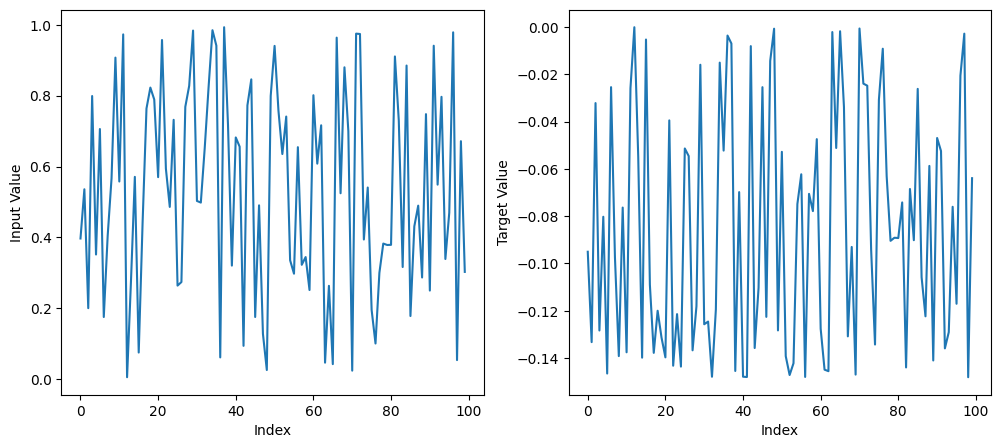

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# generate 100 random number in [0,1)
x = np.random.rand(100)

# calculate corresponding targets
t = [entry**3 - entry**2 for entry in x]

# create figure and set size
plt.figure(figsize=(12, 5))

#first subplot for input
plt.subplot(121)
plt.plot(range(100), x)
plt.xlabel("Index")
plt.ylabel("Input Value")

#second subplot for target
plt.subplot(122)
plt.plot(range(100), t)
plt.xlabel("Index")
plt.ylabel("Target Value")

plt.show()

## Task 2

In [81]:
class Layer:
    def __init__(self, n_units: int, input_unit: int) -> None:
        """
        Instantiate a layer of perceptrons

        Args:
            n_units (int): Number of units (perceptrons) in the layer
            input_unit (int): Number of units in the previous layer
        """
        self.weights = np.random.rand(input_unit, n_units)
        self.bias = np.zeros(n_units)
        self.input = None
        self.preact = None
        self.act = None
    
    def compute_preactivation(self) -> None:
        """
        Compute preactivation by summing the weighted inputs and the bias
        """
        self.preact = self.input @ self.weights + self.bias

    def compute_activation(self) -> None:
        """
        Compute activation by applying an activation function (ReLu)
        """
        self.act = np.maximum(0, self.preact)

    def forward_step(self, input: np.array) -> np.array:
        """
        Given new input, compute a forward step for this layer

        Args:
            input (np.array): Input from the previous layer

        Returns:
            np.array: Output for the next layer
        """
        self.input = input
        self.compute_preactivation()
        self.compute_activation()
        return self.act

    def get_activation_derivative(self) -> np.array:
        """
        Get the derivative of the activation function (ReLu) for each neuron

        Returns:
            np.array: Array of the derivative for each neuron in the layer
        """
        return np.where(self.preact <= 0, 0, 1)

    def compute_gradients(self, error_gradient: float) -> None:
        """
        Compute and store the gradients given an error gradient

        Args:
            error_gradient (float): Error gradient that is propagated back to 
                                    this layer
        """
        self.activation_derivative = self.get_activation_derivative()
        self.bias_gradient = error_gradient * self.activation_derivative
        self.weight_gradient = np.outer(self.input, self.bias_gradient)
        self.input_gradient = self.bias_gradient @ self.weights.transpose()

    def update_parameters(self) -> None:
        """
        Update the weights and bias according to the respective gradients
        """
        learning_rate = 0.01
        self.weights = self.weights - learning_rate * self.weight_gradient
        self.bias = self.bias - learning_rate * self.bias_gradient

    def backward_step(self, error_gradient: float) -> np.array:
        """
        Compute a backward step for backpropagating through this layer

        Args:
            error_gradient (float): Error gradient that is propagated back to 
                                    this layer

        Returns:
            np.array: Array of error gradients for the previous layer
        """
        self.compute_gradients(error_gradient)
        self.update_parameters()
        return self.input_gradient
